# Intro to NumPy

We're going to meet the NumPy library for maths, numerics, ndarrays, linear algebra, and more.

In [2]:
import numpy as np

Let's load a bit of data.

In [16]:
ds = np.DataSource('../data')  # <- Local target.

url = 'https://geocomp.s3.amazonaws.com/data/GR-NPHI-RHOB-DT.npy'
gr, _, _, dt = np.load(ds.open(url, mode='rb')).T

dt

array([82.53010001, 81.7004    , 82.9246    , 81.796     , 81.1015    ,
       82.4635    , 84.49229999, 82.7202    , 82.8683    , 86.2192    ,
       86.0696    , 86.0411    , 82.1037    , 79.6372    , 79.32350001,
       82.4433    , 82.9408    , 79.6883    , 79.1609    , 80.0252    ,
       78.7772    , 79.576     , 79.1543    , 79.3203    , 78.4387    ,
       80.1908    , 79.762     , 79.0326    , 78.7939    , 78.7006    ,
       78.2693    , 78.8674    , 80.2621    , 78.1063    , 78.9166    ,
       78.1695    , 78.44      , 79.0334    , 76.98660001, 80.0743    ,
       81.1474    , 83.72179999, 79.7092    , 80.4112    , 80.2697    ,
       80.4792    , 78.8606    , 77.3351    , 78.8272    , 78.669     ,
       78.8471    , 79.4936    , 76.2039    , 79.3505    , 78.3355    ,
       77.3453    , 78.6084    , 76.1602    , 79.3752    , 77.0704    ,
       78.8904    , 80.3703    , 80.00720001, 79.334     , 79.022     ,
       82.693     , 80.1582    , 80.22649999, 81.2335    , 80.38

In [6]:
dt[30]

78.26930000272084

In [7]:
dt[30:40]

array([78.2693    , 78.8674    , 80.2621    , 78.1063    , 78.9166    ,
       78.1695    , 78.44      , 79.0334    , 76.98660001, 80.0743    ])

These are NumPy arrays, which we'll meet properly in a minute. For now, just notice that they look a lot like lists... which might mean that our functions work on them.

In [9]:
def vp_from_dt(dt):
    return 1e6 / dt

vp = vp_from_dt(dt)
vp

array([12116.79132738, 12239.84215506, 12059.14770825, 12225.53670114,
       12330.22817055, 12126.57721306, 11835.39801933, 12088.94562611,
       12067.34058678, 11598.34468447, 11618.50409459, 11622.35257294,
       12179.71906257, 12556.94574871, 12606.604599  , 12129.54842887,
       12056.7923144 , 12548.8936266 , 12632.49912514, 12496.06374001,
       12694.0282211 , 12566.60299585, 12633.55244123, 12607.11318559,
       12748.80894248, 12470.25843384, 12537.2984629 , 12653.00648088,
       12691.33778116, 12706.38343281, 12776.40147497, 12679.5101647 ,
       12459.18060984, 12803.06454096, 12671.60521408, 12792.71327072,
       12748.59765423, 12652.87840331, 12989.27345713, 12488.40139744,
       12323.2537334 , 11944.32035726, 12545.60326811, 12436.07855625,
       12458.00096431, 12425.57083073, 12680.60349562, 12930.73908238,
       12685.97641424, 12711.48737034, 12682.77463581, 12579.62905216,
       13122.68794574, 12602.31504526, 12765.60435544, 12929.0338267 ,
      

Our functions do work on them!

and they are easy to plot:

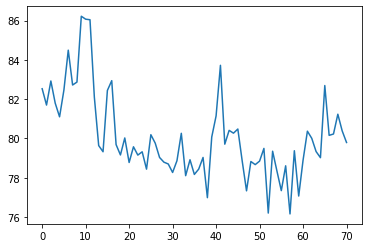

In [15]:
import matplotlib.pyplot as plt

plt.plot(dt)

## What is NumPy?

NumPy provides two fundametal objects: an _n_-dimensional array object (`ndarray`) and a universal function object (`ufunc`). The `ndarray` is a data structure, and the `ufunc` is a protocol for performing very fast elementwise operations on those data structures. 

As we have seen, NumPy's `ndarray` data structures are a lot like lists. We can even throw them into the functions we wrote for lists. 

As we'll see, however, they have a big advantage over lists. The punchline is, we're going to want to re-write our functions.

We instantiate an `ndarray` with a list, or any sequence:

In [ ]:
import numpy as np

In [ ]:
a = np.array([1, 2, 3, 4, 5])

In [ ]:
a.append(6)

OK, so they're not exactly like lists. Indeed, there's one very big difference. 

Recall that trying to multiply a list doesn't do what you want it to do:

In [ ]:
b = [1, 2, 3, 4, 5]
print(10 * b)

Instead, to multiply the numbers in a list by 10, we have to do something like this:

In [ ]:
[10 * n for n in b]

But NumPy has a superpower: ufunc. What the heck is ufunc? It doesn't really matter, the point is what it enables: elementwise arithmetic. 

In [ ]:
a

In [ ]:
10 * a

Specifically an N-dimensional array is a homogenous collection of 'items' indexed using N integers. With a 1-D array, you can index into a single element using 1 integer, with a 2-D array you need two integers, etc. 

This proves to be A Very Powerful Thing.

NumPy contains lots of other tools, including convolution, interpolation, and linear algebra operators, but most of what we do with it every day revolves around the `ndarray`, so we're going to spend a bit of time getting to know them.

## The `ndarray`

There are two essential pieces of information that define an _n_-dimensional array. The shape of the array, and the kind of item that the array is composed of:

### shape

    >>> a = np.arange(5)
    >>> a.shape
    (5,)

is an `tuple` of _n_ integers (one for each dimension) that provides information about how far the index can vary in that dimension. 

### dtype

    >>> a.dtype
    dtype('int64')

Because the `ndarray` is a homogeneous collection of exactly the same data type, NumPy code can be very fast.

## Array creation

There are plenty [array creation routines](https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html) in NumPy allowing you to generate data from scratch, or from existing data. 

- `np.ones`, `np.zeros`, `np.ones_like`

- `np.arange`, `np.linspace`

- `np.random` module

Let's look at a few of them:

In [ ]:
np.ones(10), np.zeros(10), np.ones_like([2, 4, 6, 8])

In [ ]:
# start with 
np.ones((3,5), dtype='int16')  
np.ones((3,5)).dtype
#then try
np.ones((3,5), dtype='int16') + 2**18 

In [ ]:
np.zeros((3,5))

In [ ]:
np.ones_like(dt).shape
# we can use this to make a depth-axis or a depth basis for our sonic log.
sample_interval = 0.1524 # samples per metre 
measure_depth = np.ones_like(dt) * sample_interval
plt.plot(dt, measured_depth)

In [ ]:
np.ones(10) * np.pi

In [ ]:
%%timeit
a = np.ones((10,10,10))

In [ ]:
# np.empty can be way faster than ones or zeros because it grabs whatever is in memory
%%timeit
a = np.empty((10,10,10))

In [ ]:
np.arange(0, 10, 1)

In [ ]:
np.arange(0, 10, 1).dtype

In [ ]:
np.linspace(0, 9, 10)

a, step = np.linspace(0, depth[-1], 100, retstep=True)

In [ ]:
np.logspace(1, 3, 50)

In [ ]:
np.eye(5)

## Broadcasting

In [ ]:
np.arange(0, 10) + 1

In [ ]:
np.arange(0, 10) + np.ones(10)

In [ ]:
np.arange(10) + np.arange(0, 110, 10)

## Vector and matrix operations

NumPy chooses the correct 'orientation' for a 1D vector when performing multiplication with a 2D array:

In [ ]:
# 2D array multiplied by 1D array
np.ones((4,3)) * np.array([1, 10, 100])

In [ ]:
np.array([1, 10, 100]).reshape(-1, 1)

In [ ]:
np.array([1, 10, 100, 1000]).reshape(-1, 1)

In [ ]:
a = np.arange(120)

# minus one syntax says, 'you figure this one out'
a.reshape(-1,6) 

In [ ]:
# 2D array multiplied by 'column vector'
np.ones((4,3)) * np.array([1, 10, 100, 1000]).reshape(-1, 1)

Matrix multiply:

In [ ]:
# Can't use ordinary multiply:
np.ones((4, 3)) * np.ones((3,2))

In [ ]:
np.ones((4, 3)) @ np.ones((3, 2))

No need to 'orientate' when performing the dot (inner or scalar) product between two vectors:

In [ ]:
np.array([1, 10, 100]) @ np.array([1, 10, 100])

In [ ]:
# Matrix multiply with a vector 'just works' although you might think it shouldn't.
np.ones((3,3)) @ np.array([1, 10, 100])

In [ ]:
# Matrix multiply with a column vector
np.ones((3,3)) @ np.array([1, 10, 100]).reshape((3,1))

In [ ]:
# Another way to make column vector, equivalent to reshape(-1, 1)
np.array([1, 10, 100])[:, None]

In [ ]:
# Norm of a vector.
np.linalg.norm([3, 4])

In [ ]:
# Distance between two points.
p = np.array([3, 4])
q = np.array([6, 8])
np.linalg.norm(p - q)

Solve a linear system of equations:

$$ 3x + y/2 = 9.5 $$
$$ x - 2y = -12$$

In [ ]:
# Solve a system of equations by least squares.
G = [[3, 0.5], [1, -2]]
d = [9.5, -12]
m, residuals, rank, sv = np.linalg.lstsq(G, d)

In [ ]:
m

## Plotting

In [ ]:
theta = np.arange(0, np.pi, 0.1)
# or alternately try: theta = np.arange(0, np.pi, 0.1)
y = np.sin(theta)**2
y

In [ ]:
import matplotlib.pyplot as plt

plt.plot(theta, y, 'r-o')

## Slicing

In [ ]:
a = np.arange(20).reshape(4,5)
a

In [ ]:
# A column is not a column vector, it's just a 1D array
a[:, 0]

In [ ]:
a[:, 1]

In [ ]:
a.T

In [ ]:
# Setting values in slices
a[:, 2] *= 100
a

## Random variables

In [ ]:
np.random.random((3, 5))

Draw porosities from a normal distribution.

In [ ]:
np.random.normal(loc=20, scale=3, size=10)

In [ ]:
np.random.randint(low=1000, high=2000, size=5)

### Exercise

Can you make and then plot 20 noisy pertubations of the `dt` log we loaded earlier, given a standard deviation of 5 microseconds per metre?

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Use a function from the np.random module to make an
# array with shape (20, s), where s is the size of dt.
noise = 

# Then add it to dt to make dt_noisy.
dt_noisy = 

In [12]:
noise = np.random.normal(loc=0, scale=5, size=(20, dt.size))
dt_noisy = dt + noise

Use this code to plot your result:

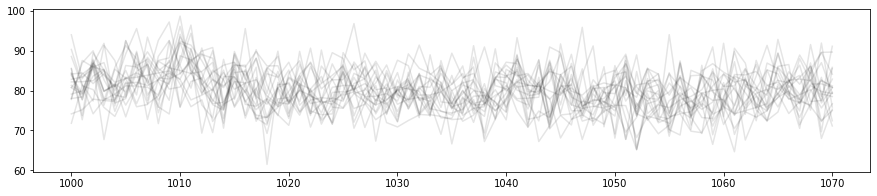

In [14]:
depth = np.arange(dt.size) + 1000

plt.figure(figsize=(15, 3))
_ = plt.plot(depth, dt_noisy.T, color='k', alpha=0.1)

In [ ]:
plt.imshow(dt_noisy.T, aspect=0.3)

## Nans

In [ ]:
a = np.nan
a

In [ ]:
# NaN is not a number, so == doesn't work as expected
a == np.nan, np.nan == np.nan

In [ ]:
a is np.nan, np.isnan(a)

## Indexing with arrays

In [ ]:
a = np.arange(25).reshape(5,5)

In [ ]:
# You can index with sequences... so can get arbitrary items from array.
# Can't do this with lists or other Python sequences.
rows = [0, 3, 4]
a[rows]

In [ ]:
# To read x's and y's from a map, you need an array of x's and an array of y's:
a[[2,3], [1, 3]]  # gets (2, 1) and (3, 3)

In [ ]:
# To get x's and y's from a list of (x, y):
xy = np.array([[2, 1], [3, 3], [0, 4]])
xy

### Exercise

Can you use simultaneous assignment and the matrix transpose operation to get separate arrays for `x` and `y`?

In [ ]:
x, y = xy.T

a[x, y]

## Masking with boolean arrays

In [ ]:
a

In [ ]:
# Boolean arrays
a > 12

In [ ]:
a[a > 12] = np.nan
a

### Exercise

Make a 2D velocity model of shape (120, 100) with 3 equal-thickness layers:

- 1486 m/s
- 2000 m/s
- 2400 m/s

Plot the result with `plt.imshow`.

In [ ]:
d, w = 120, 100
vel = np.ones((d, w)) * 1486

# Watch out for the Obiwan error.
vel[1 + d//3:1 + 2*d//3] = 2000
vel[1 - d//3:] = 2400

_ = plt.imshow(vel)

Try giving this array to your `rc_series()` function. Plot the result with `imshow`.

In [ ]:
from utils import rc_vector
rc = rc_vector(vel)
plt.imshow(rc)

In [ ]:
from bruges.filters import ricker
w = ricker(0.1, 0.002, 25)
plt.plot(w)

In [ ]:
def convolve_one_trace(tr):
    return np.convolve(tr, w, mode='same')

syn = np.apply_along_axis(convolve_one_trace, axis=0, arr=rc)

fig, axs = plt.subplots(ncols=2)
axs[0].imshow(vel)
axs[1].imshow(syn)

## Fancy indexing

In [ ]:
c = np.random.randint(3, size=(5,5))
c

In [ ]:
d = np.array([111,222,333])
d

In [ ]:
d[c]

----

### INTRO STUDENTS TURN BACK NOW

## Broadcasting example

Broadcasting is a powerful idea. Here's a function to plot a waveform:

In [ ]:
def wave(f):
    t = np.linspace(0, 1, 100)
    return np.sin(2 * np.pi * f * t)

We can of course pass a scalar for `f`:

In [ ]:
import matplotlib.pyplot as plt

f = 20
plt.plot(wave(f))

But with a small modification, we can allow the function to accept vectors for `f` too:

In [ ]:
def wave(f):
    f = np.asanyarray(f).reshape(-1, 1)
    t = np.linspace(0, 1, 100)
    return np.squeeze(np.sin(2 * np.pi * f * t))

In [ ]:
f = range(1, 31)
plt.imshow(wave(f))

Our library `bruges` implements most of its functions this way. So, for example, you can pass a range of frequencies to the Ricker-wavelet-generating function `ricker()`:

In [ ]:
import bruges

plt.imshow(bruges.filters.ricker(0.2, 0.001, range(40)))

## Array manipulation

There are a number of [array manipulation](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html) routines in NumPy. The ones we use the most are:

#### Changing shape

- `np.reshape(a, newshape)`
- `np.flatten(a)` 

#### Transpose-like operations

- `np.transpose(a[, axes)` &mdash; same as `a.T`
- `np.moveaxis(a, source, destination)`
- `np.rollaxis(a, axis[, start])`
- `np.swapaxes(a, axis1, axis2)`
- `np.flatten(a)`

#### Change the number of dimensions

- `a[:, None]` &mdash; treats an array as if it has the new dimension already, effectively adding it
- `np.reshape(a, newshape)` &mdash; where newshape contains a new dimension of size 1
- `np.expand_dims(a, axis)` &mdash; adds dimensions
- `np.squeeze(a[, axis)` &mdash; removes dimensions
- `np.atleast_1d(*arys)`, `np.atleast_2d(*arys)`, `np.atleast_3d(*arys)` &mdash; treats arys as if they have at least the specified number of dimensions

#### Joining arrays

- `np.concatenate((a1, a2, ...)[, axis, out])` – join a sequence of arrays along an existing axis
- `np.stack(arrays[, axis, out])` – join a sequence of arrays along a new axis.
- `np.hstack(tup)` – stack arrays in sequence horizontally (column-wise).
- `np.vstack(tup)` – stack arrays in sequence vertically (row-wise).
- `np.block(arrays)` – assemble an `ndarray` from nested lists of blocks.

#### Spltting arrays

- `np.spilt(arr, indices_or_sections[, axis])`

#### Tiling arrays

- `np.tile(A, reps)` – construct an array by repeating A the number of times given by reps
- `np.repeat(a, repeat[, axis])` - repeat elements of an array

#### Rearraging elements

- `np.flip(m[, axis])` – reverse the order of elements in an array along the give axis
- `np.fliplr(m)` – flip an array in the left-right direction.
- `np.flipud(m)` – flip the array in the up-down direction
- `np.reshape(a, newshape[, order])` – gives a new shape to an array without changing it's data
- `np.roll(a, shift[, axis])` - roll array elements along a given axis

#### Adding and removing elements

- `np.trim_zeros(filt[,trim])` – Trim the leading and/or trailing zeros from a 1-D array or sequence.
- `np.unique(ar[, return_index, return_inverse, ...])` – Find the unique elements of an array

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2018</p>
</div>